<Axes: xlabel='Timestamp'>

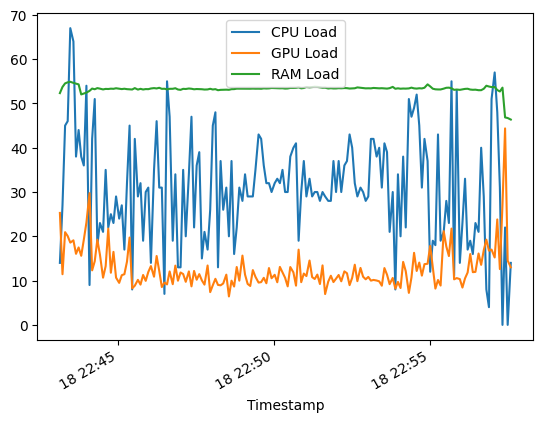

In [9]:
import glob
import os
import pandas as pd

def get_latest_file_name(folder_path, file_extension='*'):
  # Use glob to get all files with the given extension in the folder
  files = glob.glob(os.path.join(folder_path, file_extension))
  
  # Check if there are any files in the folder
  if not files:
    return None
  
  # Get the file with the latest modification time
  latest_file = max(files, key=os.path.getmtime)
  
  # Extract and return just the file name
  latest_file_name = os.path.abspath(latest_file)
  return latest_file_name


# df = pd.read_csv("out\\filename.csv", parse_dates=["Timestamp"], date_format='%Y%m%d_%H%M%S')
df = pd.read_csv(get_latest_file_name("out", "*.csv"), parse_dates=["Timestamp"], date_format='%Y%m%d_%H%M%S')

pd.set_option("display.max.columns", None)
df.head()

%matplotlib inline

df.plot(x="Timestamp", y=["CPU Load", "GPU Load", "RAM Load"])